In [1]:
# Input data
import numpy as np
from utilities import *

# test and train read
X_train_valid, Y_train_valid, _ = read_data(data_path="../../datasets/har/har-data/", split="train")
X_test, Y_test, _ = read_data(data_path="../../datasets/har/har-data/", split="test")

In [34]:
# Normalizing/standardizing the input data features
X_train_valid_norm, X_test_norm = standardize(test=X_test, train=X_train_valid)
Y_train_valid_onehot = one_hot(labels=Y_train_valid.reshape(-1), n_class=6) 
Y_test_onehot = one_hot(labels=Y_test.reshape(-1), n_class=6) 

In [35]:
# Train and valid split
from sklearn.model_selection import train_test_split

X_train_norm, X_valid_norm, Y_train_onehot, Y_valid_onehot = train_test_split(X_train_valid_norm, 
                                                                              Y_train_valid_onehot,
                                                                              test_size=0.10)

In [36]:
## Hyperparameters
# Input data
# NWC for signal: N is batch size, W is the width/sequence length, and C is the number of channels
# NHWC for images: This is the same as signals and H stands for height
N, W, C = X_train_norm.shape[0]//100, X_train_norm.shape[1], X_train_norm.shape[2]
batch_size, seq_len, n_channels = N, W, C
print('batch_size, seq_len, n_channels', batch_size, seq_len, n_channels)

# Output labels
n_classes = Y_train_valid.max(axis=0)
assert Y_train_valid.max(axis=0) == Y_test.max(axis=0)
print('n_classes', n_classes)

# learning parameters
learning_rate = 0.0001 #1e-4
epochs = 100 # num iterations for updating model
keep_prob = 0.50 # 90% neurons are kept and 10% are dropped out

batch_size, seq_len, n_channels 66 128 9
n_classes 6


In [37]:
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [38]:
# Input and output and hyperpaprameters NP tensors to feed into TF tensors: NP2TF tensors for computation
# Input and output and hyperpaprameters tensors to feed into the tensor flow framwork
Xin = tf.placeholder(dtype=tf.float32, shape=[None, seq_len, n_channels], name = 'Xin')
keep_prob_= tf.placeholder(dtype=tf.float32, name = 'keep_prob_', shape=None)
learning_rate_ = tf.placeholder(dtype=tf.float32, name = 'learning_rate_', shape=None)

In [39]:
# # Successfully implemented!
# # Simple example of running it;
# # This is a simple example of using placeholder to define a tensor and feed it into the session
# # Also doing this, we can see how it might work using the session
# # tensor, varilable, and operation for generating an output for high performance computation
# Xexample = tf.placeholder(dtype=tf.float32, shape=(1024, 1024), name=None)
# Yexample = tf.matmul(a=Xexample, b=Xexample, name=None)

# with tf.Session() as sess:
# #   print(sess.run(y))  # ERROR: will fail because x was not fed.

# #     rand_array = np.random.rand(1024, 1024)
# #     Xin = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=Xexample.shape, stddev=1.)    
#     Xin = np.random.normal(loc=0., scale=1., size=Xexample.shape)
#     print(Xexample.shape)
#     print(Xin.shape, Xin.dtype)
#     Yout = sess.run(fetches=Yexample, feed_dict={Xexample: Xin})
#     print(Yout.shape, Yout.dtype, Yexample.shape, Yexample.dtype)  # Will succeed.

In [40]:
# Successfull!
# print(inputs_.shape, inputs_.dtype, inputs_.shape[0], inputs_.shape[1], inputs_.shape[2])
# # NWC=?, 128, 9
# width, in_ch, out_ch = inputs_.shape[1]//4, inputs_.shape[2], inputs_.shape[2]*2
# # print(width, in_ch, out_ch)
# filter_shape=[width.value, in_ch.value, out_ch.value]
# print(filter_shape)
# init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, stddev=1., shape=filter_shape)
# # print(init_val.shape, init_val.dtype)
# # filters = tf.get_variable(shape=[width, in_ch, out_ch], name='conv1d1', dtype=tf.float32, trainable=True)
# filter1 = tf.Variable(initial_value=init_val, dtype=tf.float32, name=None, trainable=True)
# conv1d = tf.nn.conv1d(data_format='NWC', filters=filter1, name=None, padding='SAME', stride=2,
#                       use_cudnn_on_gpu=True, value=inputs_)
# print(conv1d.shape, conv1d.dtype)
# filterT = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
# print(filterT.shape, filterT.dtype)
# output_shape = [batch_size, inputs_.shape[1].value, inputs_.shape[2].value]
# print(output_shape)
# conv1dT = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=filterT, name=None, output_shape=output_shape, 
#                                          padding='SAME', stride=2, value=conv1d)
# print(conv1dT.shape, conv1d.dtype)

In [41]:
# Successfull!
# # This is explaining a single operation on input tensors and varilables to generate the output tensor
# # The pull request is open as of this moment, so the API and behavior can and probably will change. 
# # Some feature that one might expect from conv1d_transpose aren't supported:

# # output_shape requires batch size to be known statically, can't pass -1;
# # on the other hand, output shape is dynamic (this explains None dimension).
# # Also, the kernel_width=7 expects in_width=255, not 256. 
# # Should make kernel_width less than 4 to match in_width=256. 
# # The result is this demo code:
# Xexample = tf.placeholder(shape=[None, 256, 16], dtype=tf.float32, name=None)
# print(Xexample.shape, Xexample.dtype)
# [kernel_width, output_depth, input_depth] = [Xexample.shape[1].value//4, Xexample.shape[2].value//2, 
#                                              Xexample.shape[2].value]
# shape = [kernel_width, output_depth, input_depth] 
# print(shape)
# init_val = tf.random_normal(shape=shape, dtype=tf.float32, mean=0., name=None, stddev=1.)
# Wexample = tf.Variable(initial_value=init_val, dtype=tf.float32, name=None, trainable=True)
# print(Wexample.shape, Wexample.dtype)
# # output shape is based on NWC: batch size, width, and Channels
# stride = 4
# shape = [1, Xexample.shape[1].value*stride, Wexample.shape[1].value] 
# print(shape)
# Yexample = tf.contrib.nn.conv1d_transpose(value=Xexample, filter=Wexample, output_shape=shape, data_format='NWC',
#                                      name=None, stride=4, padding='SAME')
# # both paddings 'SAME' or 'VALID' work # any difference?
# print(Yexample.shape, Yexample.dtype)

# with tf.Session() as sess:
#     sess.run(fetches=tf.global_variables_initializer())
#     print(Xexample.shape)
#     shape = [Yexample.shape[0].value, Xexample.shape[1].value, Xexample.shape[2].value]
#     print(shape)
#     Xin = np.random.normal(loc=0., scale=1., size=shape) 
#     Yout = sess.run(fetches=Yexample, feed_dict={Xexample: Xin})
#     print(Yout.shape, Yout.dtype)

In [42]:
print(Xin.shape, Xin.dtype)
# shape = [kernel_width, input_depth, output_depth] 
shape = [Xin.shape[1].value//4, Xin.shape[2].value, Xin.shape[2].value*2]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W1 = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W1.shape, W1.dtype)
Xconv1 = tf.nn.conv1d(data_format='NWC', filters=W1, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=Xin)
Xconv1 = tf.nn.relu(features=Xconv1, name=None)
print(Xconv1.shape, Xconv1.dtype)

(?, 128, 9) <dtype: 'float32'>
(32, 9, 18) <dtype: 'float32_ref'>
(?, 64, 18) <dtype: 'float32'>


In [43]:
print(Xconv1.shape, Xconv1.dtype)
shape = [Xconv1.shape[1].value//4, Xconv1.shape[2].value, Xconv1.shape[2].value*2]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W2 = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W2.shape, W2.dtype)
Xconv2 = tf.nn.conv1d(data_format='NWC', filters=W2, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=Xconv1)
Xconv2 = tf.nn.relu(features=Xconv2, name=None)
print(Xconv2.shape, Xconv2.dtype)

(?, 64, 18) <dtype: 'float32'>
(16, 18, 36) <dtype: 'float32_ref'>
(?, 32, 36) <dtype: 'float32'>


In [44]:
print(Xconv2.shape, Xconv2.dtype)
shape = [Xconv2.shape[1].value//4, Xconv2.shape[2].value, Xconv2.shape[2].value*2]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W3 = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W3.shape, W3.dtype)
Xconv3 = tf.nn.conv1d(data_format='NWC', filters=W3, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
                     value=Xconv2)
Xconv3 = tf.nn.relu(features=Xconv3, name=None)
print(Xconv3.shape, Xconv3.dtype)

(?, 32, 36) <dtype: 'float32'>
(8, 36, 72) <dtype: 'float32_ref'>
(?, 16, 72) <dtype: 'float32'>


In [45]:
print(Xconv3.shape, Xconv3.dtype)
shape = [Xconv2.shape[1].value//4, Xconv2.shape[2].value, Xconv2.shape[2].value*2]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W3T = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W3T.shape, W3T.dtype)
# output shape should be NWC equal to Xconv2
out_shape = [batch_size, Xconv2.shape[1].value, Xconv2.shape[2].value] # NWC, only N should be set (experimental)
print(out_shape)
Xconv2_ = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=W3T, name=None, padding='SAME', stride=2, 
                                         value=Xconv3, output_shape=out_shape)
Xconv2_ = tf.nn.relu(features=Xconv2_, name=None)
print(Xconv2_.shape, Xconv2_.dtype)
print(Xconv2.shape, Xconv2.dtype)

(?, 16, 72) <dtype: 'float32'>
(8, 36, 72) <dtype: 'float32_ref'>
[66, 32, 36]
(66, 32, 36) <dtype: 'float32'>
(?, 32, 36) <dtype: 'float32'>


In [46]:
print(Xconv2_.shape, Xconv2_.dtype)
shape = [Xconv1.shape[1].value//4, Xconv1.shape[2].value, Xconv1.shape[2].value*2]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W2T = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W2T.shape, W2T.dtype)
# output shape should be NWC equal to Xconv1
out_shape = [batch_size, Xconv1.shape[1].value, Xconv1.shape[2].value] # NWC, only N should be set (experimental)
print(out_shape)
Xconv1_ = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=W2T, name=None, padding='SAME', stride=2, 
                                         value=Xconv2_, output_shape=out_shape)
Xconv1_ = tf.nn.relu(features=Xconv1_, name=None)
print(Xconv1_.shape, Xconv1_.dtype)
print(Xconv1.shape, Xconv1.dtype)

(66, 32, 36) <dtype: 'float32'>
(16, 18, 36) <dtype: 'float32_ref'>
[66, 64, 18]
(66, 64, 18) <dtype: 'float32'>
(?, 64, 18) <dtype: 'float32'>


In [49]:
print(Xconv1_.shape, Xconv1_.dtype)
shape = [Xin.shape[1].value//4, Xin.shape[2].value, Xin.shape[2].value*2]
init_val = tf.random_normal(dtype=tf.float32, mean=0., name=None, shape=shape, stddev=1.0)
W1T = tf.Variable(dtype=tf.float32, initial_value=init_val, name=None, trainable=True)
print(W1T.shape, W1T.dtype)
# output shape should be NWC equal to Xin
out_shape = [batch_size, Xin.shape[1].value, Xin.shape[2].value] # NWC, only N should be set (experimental)
print(out_shape)
Xout = tf.contrib.nn.conv1d_transpose(data_format='NWC', filter=W1T, name=None, padding='SAME', stride=2, 
                                         value=Xconv1_, output_shape=out_shape)
# Xin_ = tf.nn.relu(features=Xin_, name=None)
print(Xout.shape, Xout.dtype)
print(Xin.shape, Xin.dtype)

(66, 64, 18) <dtype: 'float32'>
(32, 9, 18) <dtype: 'float32_ref'>
[66, 128, 9]
(66, 128, 9) <dtype: 'float32'>
(?, 128, 9) <dtype: 'float32'>


In [50]:
# Backward pass: error backpropagation
# Cost function
# cost_tensor = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_)
cost_tensor = tf.nn.sigmoid_cross_entropy_with_logits(labels=Xin, logits=Xout, name=None)
print(cost_tensor.shape, cost_tensor.dtype)
cost = tf.reduce_mean(input_tensor=cost_tensor)
cost = tf.abs(name=None, x=cost)
print(cost.shape, cost.dtype)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_).minimize(cost)
print('optimizer', optimizer)

(66, 128, 9) <dtype: 'float32'>
() <dtype: 'float32'>
optimizer name: "Adam_3"
op: "NoOp"
input: "^Adam_3/update_Variable_12/ApplyAdam"
input: "^Adam_3/update_Variable_13/ApplyAdam"
input: "^Adam_3/update_Variable_14/ApplyAdam"
input: "^Adam_3/update_Variable_15/ApplyAdam"
input: "^Adam_3/update_Variable_16/ApplyAdam"
input: "^Adam_3/update_Variable_19/ApplyAdam"
input: "^Adam_3/Assign"
input: "^Adam_3/Assign_1"



In [52]:
# Save the training result or trained and validated model params
saver = tf.train.Saver()
train_loss, valid_loss = [], []

with tf.Session() as sess:
    # my assumption is the local variables are the parameters and hyperparameters
    # the globala variables are the one needed/required by the seession/graph to run
    sess.run(fetches=tf.global_variables_initializer())
   
    # Loop over epochs
    for e in range(epochs):
        
        # Loop over batches
        for X_train_norm_batch, _ in get_batches(X_train_norm, Y_train_onehot, batch_size):
            
            ######################## Training
            # Feed dictionary
            feed = {Xin : X_train_norm_batch, keep_prob_ : 0.95, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ = sess.run(fetches=[cost, optimizer], feed_dict = feed)
            train_loss.append(loss)

            ################## Validation
            loss_batch = []    
            # Loop over batches
            for X_valid_norm_batch, _ in get_batches(X_valid_norm, Y_valid_onehot, batch_size):

                # Feed dictionary
                feed = {Xin : X_valid_norm_batch, keep_prob_ : 1.0} 
                # no learning is needed therefore no learning rate is needed.

                # Loss
                loss = sess.run(fetches=[cost], feed_dict = feed)
                # no learning is needed therefore no learning rate is needed.
                # Therefore no optimization approach or backprop is needed either.
                loss_batch.append(loss)

            # Store
            valid_loss.append(np.mean(loss_batch))
            
        # Print info for every iter/epoch
        print("Epoch: {}/{}".format(e+1, epochs),
              "Train loss: {:6f}".format(np.mean(train_loss)),
              "Valid loss: {:.6f}".format(np.mean(valid_loss)))
                
    saver.save(sess,"checkpoints/cnn-har-TEST.ckpt")

Epoch: 1/100 Train loss: 922495.687500 Valid loss: 932820.875000
Epoch: 2/100 Train loss: 707970.500000 Valid loss: 715640.312500
Epoch: 3/100 Train loss: 563612.000000 Valid loss: 569524.375000
Epoch: 4/100 Train loss: 455472.312500 Valid loss: 460006.312500
Epoch: 5/100 Train loss: 371090.187500 Valid loss: 376383.593750
Epoch: 6/100 Train loss: 314066.031250 Valid loss: 319681.812500
Epoch: 7/100 Train loss: 273076.656250 Valid loss: 278923.125000
Epoch: 8/100 Train loss: 242141.343750 Valid loss: 248159.500000
Epoch: 9/100 Train loss: 217934.109375 Valid loss: 224071.437500
Epoch: 10/100 Train loss: 198436.984375 Valid loss: 204666.265625
Epoch: 11/100 Train loss: 182402.796875 Valid loss: 188689.078125
Epoch: 12/100 Train loss: 168927.296875 Valid loss: 175269.046875
Epoch: 13/100 Train loss: 157446.078125 Valid loss: 163834.453125
Epoch: 14/100 Train loss: 147528.531250 Valid loss: 153950.625000
Epoch: 15/100 Train loss: 138875.500000 Valid loss: 145326.171875
Epoch: 16/100 Train

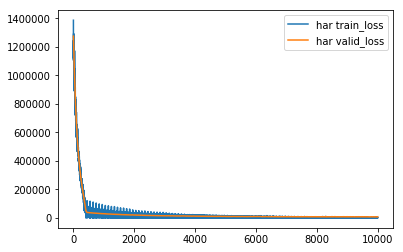

In [54]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss, label='har train_loss')
mplot.plot(valid_loss, label='har valid_loss')
mplot.legend()
mplot.show()

In [56]:
# initilize the saver which has already been initialized.
test_loss = []

with tf.Session() as sess:
    # Restore the validated model
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    ################## Test
    loss_batch = []    
    # Loop over batches
    for X_test_norm_batch, _ in get_batches(X_test_norm, Y_test_onehot, batch_size):

        # Feed dictionary
        # No learning/training is needed at this step
        feed = {Xin: X_test_norm_batch, keep_prob_ : 1.0}

        # Loss
        # Only the computation of the cost is needed
        loss = sess.run(fetches=[cost], feed_dict = feed)
        loss_batch.append(loss)

    # Store
    test_loss.append(np.mean(loss_batch))

    # Print info for every iter/epoch
    print("Test loss: {:6f}".format(np.mean(test_loss)))

INFO:tensorflow:Restoring parameters from checkpoints/cnn-har-TEST.ckpt
Test loss: 32326.398438
